# linear regression（线性回归）
## 1. 单变量梯度下降
### 1.1 plot data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex1data1.txt", names = ['population', 'profit'])

In [3]:
df.head(5)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


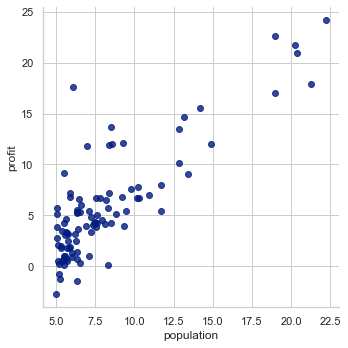

In [4]:
sns.set(context="notebook", style="whitegrid", palette="dark")
sns.lmplot(x='population', y='profit', data=df, height=5, fit_reg = False)
plt.show()

多变量的假设h表示为：
$$ h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$
这个公式中有n+1个参数和n个变量，为了使公式能够简化一些，引入$x_0 = 1$，则公式转换为：
$$ h_{\theta}(x) = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$
此时模型中的参数是一个$n+1$维的向量，任何一个训练实例也都是$n+1$维的向量，特征矩阵X的维度是$m*(n+1)$。因此公式可以简化为：
$$ h_{\theta}(x) = \theta^TX $$
其中，上标T代表矩阵转置。

In [5]:
def get_X(df): # read features
    ones = pd.DataFrame({'ones': np.ones(df.shape[0])})
    data = pd.concat([ones, df], axis = 1)
    return data.iloc[:,:-1].values

def get_y(df): # read label
    return df.iloc[:,-1].values

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean())/column.std()) # feature scaling

### 1.2 计算代价函数
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^m\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^2 $$
其中，
$$ h_{\theta}(x) = \theta^TX = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$

In [6]:
X = get_X(df)
y = get_y(df)
theta = np.zeros(X.shape[1])

In [7]:
def compute_cost(X, y, theta):
    inner = X@theta - y
    return (inner**2).sum()/(2*len(X))

In [8]:
compute_cost(X, y, theta)

32.072733877455676

### 1.3 批量梯度下降（batch gradient decent）
$$ \theta_j:=\theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta) $$
其中，
$$ \frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i = 1}^m\left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x_j^{(i)} $$
其中，$ x_0 = 1 $

In [9]:
def gradient(X, y, theta):
    m = len(X)
    inner = X.T @ (X @ theta - y)
    return inner/m

In [10]:
def batch_gradient_decent(X, y, theta, epoch, alpha = 0.02):
    cost_data = [compute_cost(X, y, theta)]
    _theta = theta.copy()
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(X, y, _theta)
        cost_data.append(compute_cost(X, y, _theta))
    return _theta, cost_data

In [11]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(X, y, theta, epoch)

In [12]:
final_theta

array([-3.24246827,  1.12740131])

In [13]:
cost_data[-1]

4.515828578882345

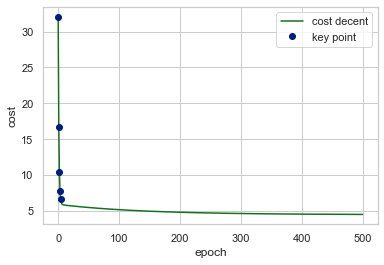

In [14]:
fig, ax = plt.subplots()
ax.plot(cost_data, 'g-', label = 'cost decent')
ax.plot(cost_data[:5], 'bo', label = 'key point')
ax.legend(loc = 0)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()

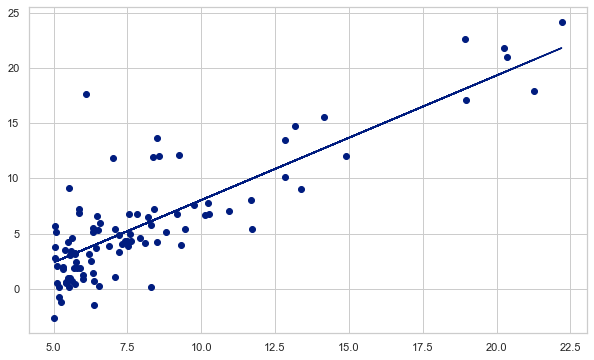

In [15]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,1], y)
plt.plot(X[:,1],X @ final_theta)
plt.show()

## 2. 选修章节
### 2.1 读取数据

In [16]:
raw_data = pd.read_csv('ex1data2.txt', names = ['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.2 数据标准化

In [17]:
def normalize_features(df):
    return df.apply(lambda column : (column - column.mean())/column.std())

In [18]:
data = normalize_features(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 2.3 多变量批量梯度下降（multi-variables batch gredient decent）

In [19]:
X = get_X(data)
y = get_y(data)
theta = np.zeros(X.shape[1])

In [20]:
epoch = 500
alpha = 0.01
final_theta1, cost = batch_gradient_decent(X, y, theta, epoch, alpha)

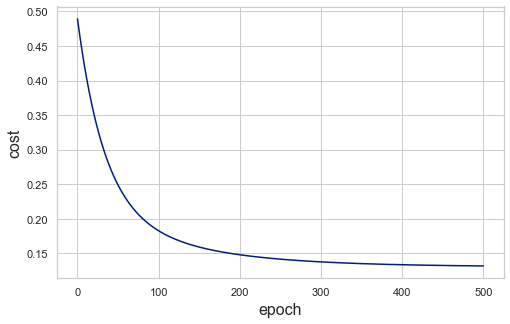

In [21]:
plt.figure(figsize = (8, 5))
plt.plot(cost)
plt.xlabel('epoch',fontsize = 16)
plt.ylabel('cost', fontsize = 16)
plt.show()

In [22]:
final_theta1

array([-1.18994649e-16,  8.30383883e-01,  8.23982853e-04])

### 2.4 学习率（learning rate）

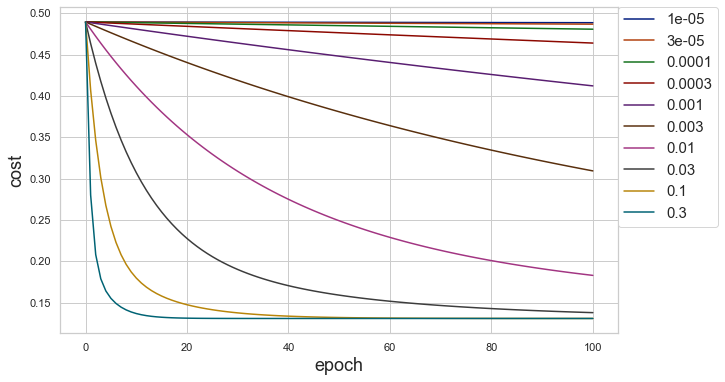

In [23]:
epoch = 100
alpha_group = np.array([0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3])

fig, ax = plt.subplots(figsize = (10, 6))

for alpha in alpha_group:
    final_theta, cost = batch_gradient_decent(X, y, theta, epoch, alpha)
    ax.plot(np.arange(epoch + 1), cost, label = str(alpha))
    
ax.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0, fontsize = 15)
ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('cost', fontsize = 18)
plt.show()

### 2.5 正规方程

正规方程是通过求解下面的方程找出使得代价函数最小的参数$\theta$：
$$ \frac{\partial}{\partial\theta_j}J\left(\theta_j\right) = 0 $$
假设我们的训练集特征矩阵为$X(包含x_0 = 1)$，训练集结果为向量$y$，则利用正规方程解出参数向量：
$$ \theta = \left(X^TX\right)^{-1}X^Ty $$
其中，上标$T$代表矩阵转置，上标$-1$表示矩阵的逆。设矩阵$ A = X^TX $，则：
$$ \left(X^TX\right)^{-1} = A^{-1} $$


梯度下降与正规方程的比较：

梯度下降：需要选择学习率$\alpha$，需要进行多次迭代，当特征数量$n$比较大的时候也可以比较容易解决问题，适用于各种类型的模型

正规方程：不需要选择学习率$\alpha$，一次计算得出，需要计算$\left(X^TX\right)^{-1}$，如果特征数量$n$较大则运算代价会非常大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型。

In [24]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [25]:
final_theta2 = normalEqn(X, y)
final_theta2

array([-1.04083409e-16,  8.84765988e-01, -5.31788197e-02])